# Bivariate Analysis
### Numerical vs Categorical

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv('star_dataset.csv')
data.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,Red Dwarf,Red,M
1,3042,0.000500,0.1542,16.60,Red Dwarf,Red,M
2,2600,0.000300,0.1020,18.70,Red Dwarf,Red,M
3,2800,0.000200,0.1600,16.65,Red Dwarf,Red,M
4,1939,0.000138,0.1030,20.06,Red Dwarf,Red,M


#### Radius bij Star type
De star types zijn onderverdeeld in categorieën op basis van hun onder andere hun grootte. Ik verwacht dus een significant verschil te zien tussen de verschillende types. 

In [3]:
star_type = 'Star type'
radius = 'Radius(R/Ro)'
data.groupby(star_type).mean().sort_values(radius)

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv)
Star type,,,,
White Dwarf,13931.450,0.002434,0.010728,12.582500
Red Dwarf,2997.950,0.000693,0.110015,17.563500
Brown Dwarf,3283.825,0.005406,0.348145,12.539975
Main Sequence,16018.000,32067.386275,4.430300,-0.367425
Super Giant,15347.850,301816.250000,51.150000,-6.369925
Hyper Giant,11405.700,309246.525000,1366.897500,-9.654250


<AxesSubplot:xlabel='Star type', ylabel='Radius(R/Ro)'>

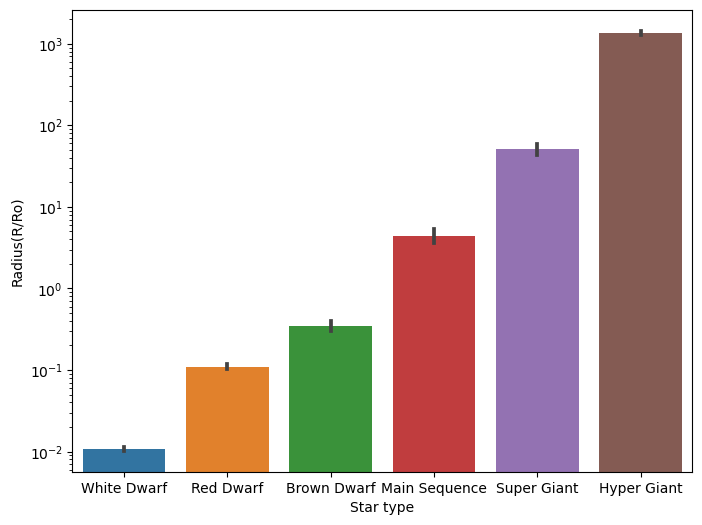

In [4]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(y=radius, x=star_type, data=data, ax=ax, log=True, order=data.groupby(star_type).mean().sort_values(radius).index)

Zoals verwacht is er een voor elke type een significant verschil in radius, de confidence intervals overlappen niet. 

#### Radius by Spectral class
Binnen een spectral class kunnen meerdere typen sterren vallen (dwarf, main sequence, giant) dus ik verwacht weinig tot geen significante verschillen te zien.

In [5]:
spectral_class = 'Spectral Class'
data.groupby(spectral_class).mean().sort_values(radius)

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv)
Spectral Class,,,,
F,8516.823529,1.383960,0.551334,8.611765
A,9842.368421,49860.247538,135.878422,4.085211
B,19574.478261,78179.393322,202.022292,3.722609
O,22294.075000,330564.625000,257.794675,-6.596175
M,3257.333333,61423.425621,273.894832,8.367829
K,4499.500000,152000.204167,475.444333,0.267333
G,6850.000000,229000.000000,1467.000000,-10.070000


<AxesSubplot:xlabel='Spectral Class', ylabel='Radius(R/Ro)'>

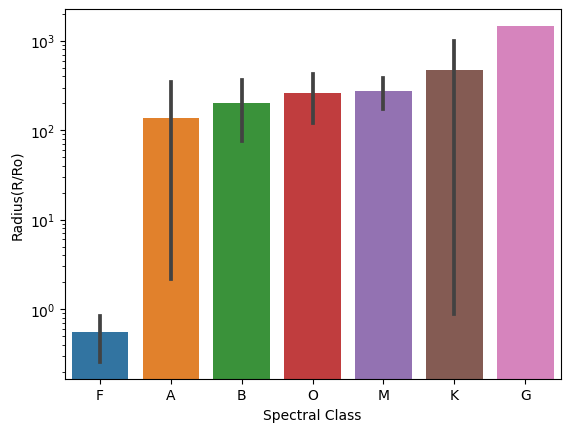

In [6]:
sns.barplot(y=radius, x=spectral_class, data=data, log=True, order=data.groupby(spectral_class).mean().sort_values(radius).index)

Zoals ook verwacht zijn er vrijwel geen significante verschillen tussen de stralen van sterren op basis van hun classificatie, behalve F en G. G is vooral omdat er maar één record is met classificatie G. Voor F is er wel een significant verschil, dus er zullen in deze dataset weinig tot geen giants met classificatie F zitten. Het lijkt erop dat in A en K veel kleine sterren zitten en het gemiddelde erg omhoog is gegaan door een aantal grotere sterren. 

In [7]:
data.groupby([spectral_class, star_type]).count()[radius]

Spectral Class  Star type    
A               Hyper Giant       2
                Main Sequence    10
                White Dwarf       7
B               Hyper Giant       7
                Main Sequence    13
                Super Giant       2
                White Dwarf      24
F               Main Sequence     8
                White Dwarf       9
G               Hyper Giant       1
K               Hyper Giant       2
                Main Sequence     4
M               Brown Dwarf      40
                Hyper Giant      22
                Red Dwarf        40
                Super Giant       9
O               Hyper Giant       6
                Main Sequence     5
                Super Giant      29
Name: Radius(R/Ro), dtype: int64

#### Temperature by Star color
Aangezien de kleur van een ster afhankelijk is van de temperatuur verwacht ik hier significante verschillen.

In [8]:
color = 'Star color'
temperature = 'Temperature (K)'
data.groupby(color).mean().sort_values(temperature)

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv)
Star color,,,,
Red,3291.785714,60526.787893,283.529700,8.173384
Orange,4382.666667,393333.543333,987.958667,-4.190000
Yellow,5203.250000,0.148770,0.700750,7.898500
Yellow-White,7609.166667,1.960553,0.776803,6.684167
White,9579.583333,78542.975191,211.647388,7.486667
Blue-White,16659.951220,68904.416521,185.800842,1.968268
Blue,21918.339286,249974.732446,214.802452,-2.382446


<AxesSubplot:xlabel='Star color', ylabel='Temperature (K)'>

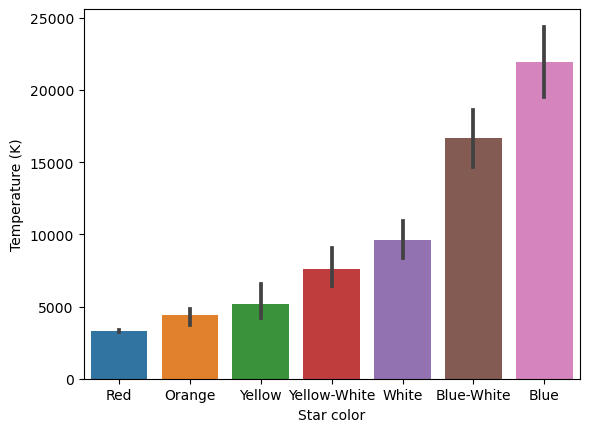

In [9]:
sns.barplot(y=temperature, x=color, data=data, order=data.groupby(color).mean().sort_values(temperature).index)

Hoewel niet overal een significant verschil is te zien tussen verschillende kleuren, kan je wel duidelijk zien dat de overlap is tussen kleuren die bij elkaar in de buurt liggen op het (licht) kleurenspectrum.